## Dummy Variables & One Hot Encoding

using <b>get_dummies</b>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("townhomeprice.csv")
df

,town,area,price
0,ada,3500,150000
1,ada,1600,78000
2,ada,2000,100000
3,ikirun,2500,200000
4,ikirun,3000,275000
5,ikirun,1500,170000
6,osogbo,1500,300000
7,osogbo,2500,350000
8,osogbo,3500,400000


In [4]:
dummies = pd.get_dummies(df.town)

In [5]:
dummies

,ada,ikirun,osogbo
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1


In [6]:
merge_data = pd.concat([df, dummies], axis="columns")

In [7]:
merge_data.head()

,town,area,price,ada,ikirun,osogbo
0,ada,3500,150000,1,0,0
1,ada,1600,78000,1,0,0
2,ada,2000,100000,1,0,0
3,ikirun,2500,200000,0,1,0
4,ikirun,3000,275000,0,1,0


In [8]:
#removing one of the dummy variable and the town column
final = merge_data.drop(["town", "osogbo"], axis="columns")


In [9]:
X = final.drop(["price"], axis="columns")
y = final.price

In [10]:
from sklearn import linear_model

In [11]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [12]:
model.predict([[2500,0,0]])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([350000.])

In [13]:
model.score(X,y)

0.9838148263071811

using <b>OneHotEncod</b>

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
dfle = df

In [17]:
dfle.town = le.fit_transform(dfle.town)

In [18]:
dfle

,town,area,price
0,0,3500,150000
1,0,1600,78000
2,0,2000,100000
3,1,2500,200000
4,1,3000,275000
5,1,1500,170000
6,2,1500,300000
7,2,2500,350000
8,2,3500,400000


In [19]:
X = dfle[["town", 'area']].values

In [ ]:
y = dfle.price

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#ohe = OneHotEncoder(categories=[0])
ct = ColumnTransformer([("one_hot_encoder", OneHotEncoder(categories="auto"), [0])], remainder='passthrough')

In [21]:
X = ct.fit_transform(X)

In [22]:
X = X[:,1:] # selecting all the rows but only the first column

In [23]:
model2 = linear_model.LinearRegression()

In [24]:
model2.fit(X,y)

LinearRegression()

In [25]:
model2.predict([[0,1,3400]])

array([393237.11340179])

In [26]:
model2.score(X,y)

0.9838148263071811

### Exercise
At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

<b>1) Predict price of a mercedez benz that is 4 yr old with mileage 45000</b>

<b>2) Predict price of a BMW X5 that is 7 yr old with mileage 86000</b>

<b>3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())</b>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [28]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


#### Mileage VS Sell Price

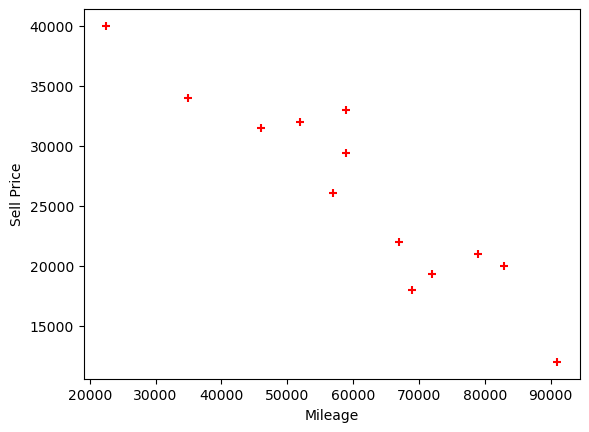

In [29]:
plt.xlabel("Mileage")
plt.ylabel("Sell Price")
plt.scatter(df.Mileage, df["Sell Price($)"], marker="+", color="red")
plt.show()

#### Age(yrs) VS Sell Price

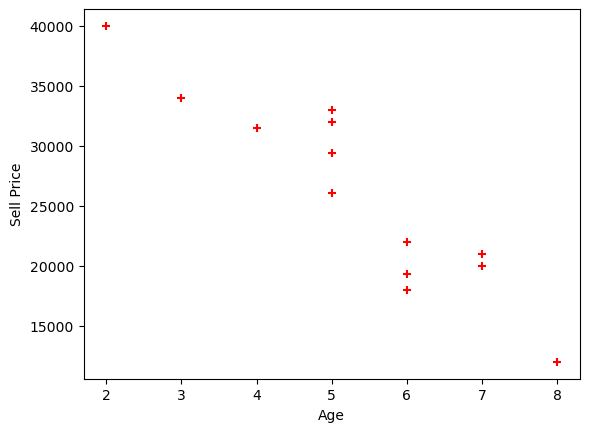

In [30]:
plt.xlabel("Age")
plt.ylabel("Sell Price")
plt.scatter(df["Age(yrs)"], df["Sell Price($)"], marker="+", color="red")
plt.show()

In [31]:
df.groupby("Car Model")["Sell Price($)"].count()

Car Model
Audi A5                  4
BMW X5                   5
Mercedez Benz C class    4
Name: Sell Price($), dtype: int64

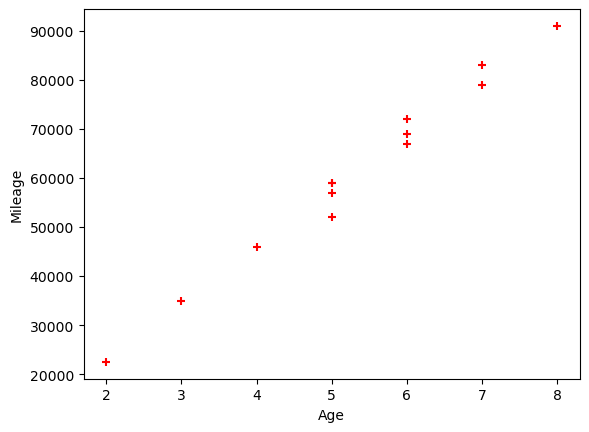

In [32]:
plt.xlabel("Age")
plt.ylabel("Mileage")
plt.scatter(df["Age(yrs)"], df.Mileage, marker="+", color="red")
plt.show()

<b>1) Predict price of a mercedez benz that is 4 yr old with mileage 45000</b>

<b>2) Predict price of a BMW X5 that is 7 yr old with mileage 86000</b>

<b>3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())</b>

### Performing Preprocessing on the features using get_dummies

In [33]:
dummies = pd.get_dummies(df["Car Model"])

In [34]:
merge_data = pd.concat([df, dummies], axis="columns")
merge_data.head()


,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0


In [35]:
X = merge_data.drop(["Car Model", "Sell Price($)", "Audi A5"], axis="columns")
y = merge_data["Sell Price($)"]


In [36]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [37]:
#predicting the price of a mercedez benz that is 4 yr old with mileage 45000
model.predict([[45000, 4, 0,1]])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [38]:
# Predicting the price of a BMW X5 that is 7 yr old with mileage 86000
model.predict([[86000, 7, 1, 0]])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [39]:
# Telling the score (accuracy) of your model. (Hint: use LinearRegression().score())
model.score(X,y)

0.9417050937281082

### Performing Preprocessing on the features using OneHotEncode
when using OneHotEncoder, your first of all encode the variable with LabelEncoder, then u ColumnTransfrom to encode it

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
dfle = df
le = LabelEncoder()
dfle["Car Model"] = le.fit_transform(dfle["Car Model"])
X = dfle.drop(["Sell Price($)"], axis="columns")
ct = ColumnTransformer(["Car Model", (OneHotEncoder(categories="auto"), [0])], remainder="passthrough")
X = ct.fit_transform(X)

ValueError: not enough values to unpack (expected 3, got 2)

## Training and Testing Data

In [58]:
import pandas as pd
import numpy as np
df = pd.read_csv("carprices.csv")
df = df[["Mileage","Age(yrs)", "Sell Price($)"]]
X = df[["Mileage", "Age(yrs)"]]
y = df["Sell Price($)"]

In [59]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
X_test
lr.predict(X_test)
lr.score(X_test, y_test) # the model is 75% accurate

0.5936106874794822